In [54]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [55]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [56]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from dateutil.relativedelta import relativedelta

In [57]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite",echo=True)

In [58]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

2023-01-12 15:42:12,499 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2023-01-12 15:42:12,500 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 15:42:12,501 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("measurement")
2023-01-12 15:42:12,501 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 15:42:12,503 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2023-01-12 15:42:12,504 INFO sqlalchemy.engine.Engine [raw sql] ('measurement',)
2023-01-12 15:42:12,505 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("measurement")
2023-01-12 15:42:12,505 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 15:42:12,506 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("measurement")
2023-01-12 15:42:12,506 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 15:42:12,507 INFO sqlalchemy.engine.Engine SELECT sql

In [59]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [60]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [61]:
# Create our session (link) from Python to the DB
session=Session(engine)


In [62]:
first_row = session.query(Measurement).first()
first_row.__dict__

2023-01-12 15:42:15,350 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-01-12 15:42:15,352 INFO sqlalchemy.engine.Engine SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement
 LIMIT ? OFFSET ?
2023-01-12 15:42:15,353 INFO sqlalchemy.engine.Engine [generated in 0.00077s] (1, 0)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1788b1466a0>,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

# Exploratory Precipitation Analysis

In [209]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


recentdate=session.query(Measurement).order_by(Measurement.date.desc()).first()
print(recentdate.date)

2023-01-12 19:49:21,429 INFO sqlalchemy.engine.Engine SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement ORDER BY measurement.date DESC
 LIMIT ? OFFSET ?
2023-01-12 19:49:21,431 INFO sqlalchemy.engine.Engine [cached since 374s ago] (1, 0)
2017-08-23


In [210]:
# Perform a query to retrieve the data and precipitation scores
prev_year=dt.date(2017,8,23)+relativedelta(months=-12)
print(prev_year)

2016-08-23


In [217]:
data=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).order_by(Measurement.date).all()

2023-01-12 19:54:18,873 INFO sqlalchemy.engine.Engine SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ? ORDER BY measurement.date
2023-01-12 19:54:18,875 INFO sqlalchemy.engine.Engine [cached since 1.351e+04s ago] ('2016-08-23',)


In [218]:
Date_list = []
Prcp_list = []
for item in data:
    Date_list.append(item.date)
    Prcp_list.append(item.prcp)
df = pd.DataFrame(Prcp_list, Date_list)
df = df.rename(columns={0:'Precipitation Scores'})

<AxesSubplot:xlabel='Date', ylabel='Inches'>

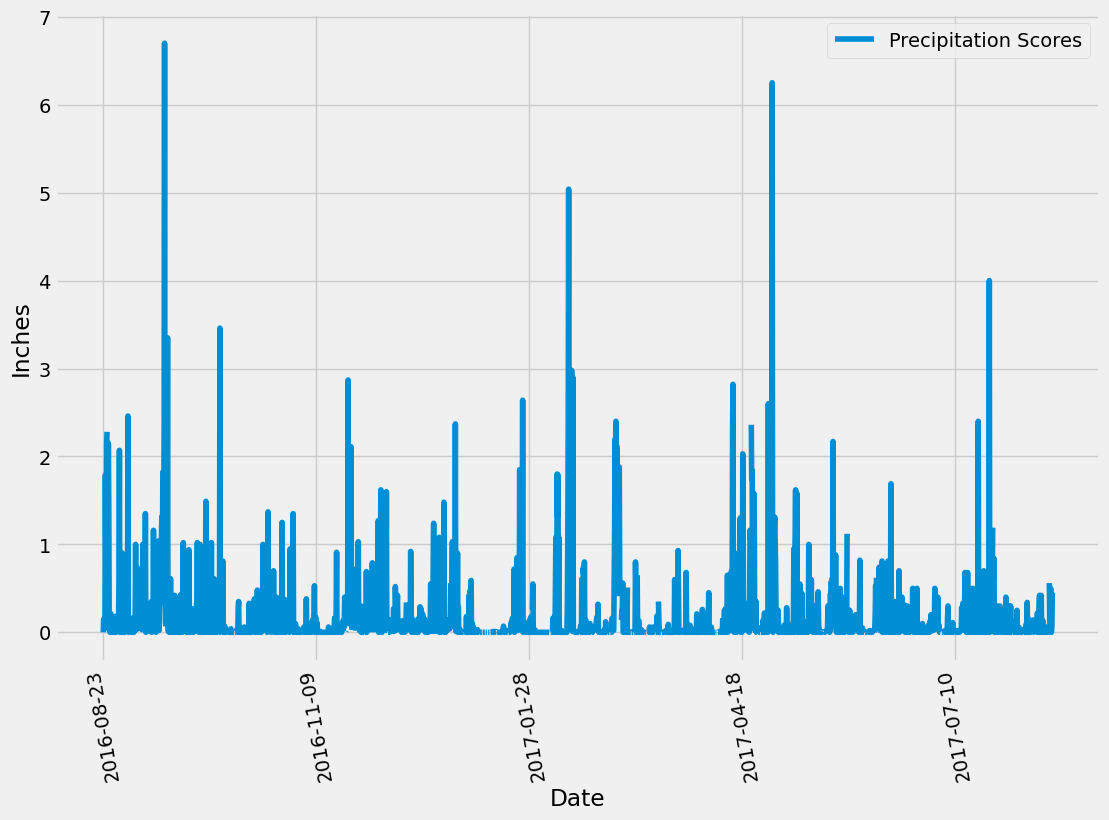

In [220]:

df.plot(xlabel="Date", ylabel="Inches", rot=100, figsize=(12,8))


In [221]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df.describe()


,Precipitation Scores
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [198]:
# Design a query to calculate the total number stations in the dataset
totalnumstation=session.query(Measurement.station).distinct().count()
print(f'Total number of stations are {totalnumstation}.')


2023-01-12 19:37:14,883 INFO sqlalchemy.engine.Engine SELECT count(*) AS count_1 
FROM (SELECT DISTINCT measurement.station AS measurement_station 
FROM measurement) AS anon_1
2023-01-12 19:37:14,884 INFO sqlalchemy.engine.Engine [generated in 0.00098s] ()
Total number of stations are 9.


In [199]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = engine.execute('SELECT station, COUNT(station) AS "Frequency count" \
                            FROM Measurement \
                            GROUP BY station \
                            ORDER BY "Frequency count" DESC;')
most_active = engine.execute('SELECT station, COUNT(station) AS "Frequency count" \
                            FROM Measurement \
                            GROUP BY station \
                            ORDER BY "Frequency count" DESC;').first()
for item in station_activity:
    print(item)
print(f'The most active station is {most_active[0]}')

2023-01-12 19:38:33,373 INFO sqlalchemy.engine.Engine SELECT station, COUNT(station) AS "Frequency count"                             FROM Measurement                             GROUP BY station                             ORDER BY "Frequency count" DESC;
2023-01-12 19:38:33,374 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-01-12 19:38:33,390 INFO sqlalchemy.engine.Engine SELECT station, COUNT(station) AS "Frequency count"                             FROM Measurement                             GROUP BY station                             ORDER BY "Frequency count" DESC;
2023-01-12 19:38:33,390 INFO sqlalchemy.engine.Engine [raw sql] ()
('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
The most active station is USC00519281


In [201]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
avrg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active[0]).first()
print(f'The lowest temperature of station {most_active[0]} is {min_temp[0]}')
print(f'The highest temperature of station {most_active[0]} is {max_temp[0]}')
print(f'The average temperature of station {most_active[0]} is {avrg_temp[0]}')

2023-01-12 19:40:38,232 INFO sqlalchemy.engine.Engine SELECT min(measurement.tobs) AS min_1 
FROM measurement 
WHERE measurement.station = ?
 LIMIT ? OFFSET ?
2023-01-12 19:40:38,233 INFO sqlalchemy.engine.Engine [cached since 82.14s ago] ('USC00519281', 1, 0)
2023-01-12 19:40:38,239 INFO sqlalchemy.engine.Engine SELECT max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.station = ?
 LIMIT ? OFFSET ?
2023-01-12 19:40:38,239 INFO sqlalchemy.engine.Engine [cached since 82.14s ago] ('USC00519281', 1, 0)
2023-01-12 19:40:38,243 INFO sqlalchemy.engine.Engine SELECT avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.station = ?
 LIMIT ? OFFSET ?
2023-01-12 19:40:38,244 INFO sqlalchemy.engine.Engine [cached since 82.14s ago] ('USC00519281', 1, 0)
The lowest temperature of station USC00519281 is 54.0
The highest temperature of station USC00519281 is 85.0
The average temperature of station USC00519281 is 71.66378066378067


2023-01-12 20:06:03,457 INFO sqlalchemy.engine.Engine SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= ? AND measurement.station = ? ORDER BY measurement.date DESC
2023-01-12 20:06:03,458 INFO sqlalchemy.engine.Engine [cached since 555s ago] ('2016-08-23', 'USC00519281')


<AxesSubplot:ylabel='Frequency'>

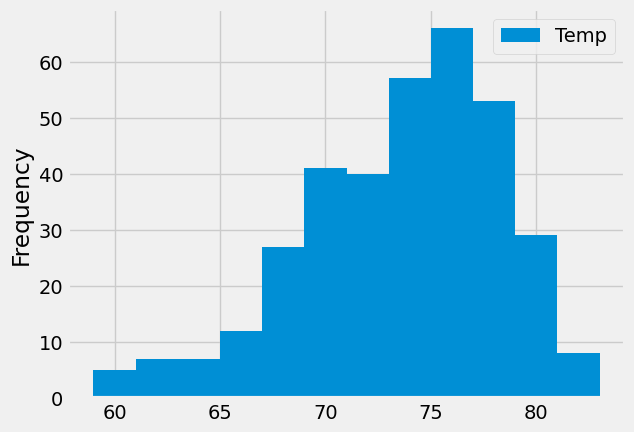

In [228]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp=session.query(Measurement).\
    filter(Measurement.date>=prev_year,Measurement.station == most_active[0]).order_by(Measurement.date.desc()).all()

temp_list = []
for item in temp:
    temp_list.append(item.tobs)
    
temperatures = pd.DataFrame(temp_list).rename(columns={0:'Temp'})
temperatures.plot(kind='hist', bins=12)



# Close session

In [229]:
# Close Session
session.close()

2023-01-12 20:06:20,814 INFO sqlalchemy.engine.Engine ROLLBACK
